# Welcome to the Algorithmic Trading Society at Imperial


This course will introduce you to Algorithmic trading and enable you to come up with your own strategies using Technical Analysis and Machine Learning.

In [1]:
! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Importing Stock Price Data from Yahoo Finance

In [3]:
ticker = ["AAPL", "BA", "KO", "GOOGL", "DIS", "XOM" ]

In [4]:
stocks = yf.download(ticker, start = "2012-01-01", end = "2022-09-06")
print(type(stocks))

[*********************100%***********************]  6 of 6 completed
<class 'pandas.core.frame.DataFrame'>


In [5]:
stocks.head()

Adj Close                                                         \
                 AAPL         BA        DIS      GOOGL         KO        XOM   
Date                                                                           
2012-01-03  12.519278  60.731098  34.300610  16.651901  24.902021  54.916348   
2012-01-04  12.586558  60.821087  34.784103  16.723724  24.745806  54.929119   
2012-01-05  12.726294  60.166504  35.366070  16.491741  24.628649  54.763096   
2012-01-06  12.859334  60.534710  35.733170  16.266768  24.472429  54.354412   
2012-01-09  12.838937  60.984734  35.589912  15.577077  24.472429  54.597057   

                Close                                   ...       Open  \
                 AAPL         BA        DIS      GOOGL  ...        DIS   
Date                                                    ...              
2012-01-03  14.686786  74.220001  38.310001  16.651901  ...  37.970001   
2012-01-04  14.765714  74.330002  38.849998  16.723724  ...  38.189999   
2012-01-05  14.929643  73.529999  39.500000  16.491741  ...  38.830002   
2012-01-06  15.085714  73.980003  39.910000  16.266768  ...  39.549999   
2012-01-09  15.061786  74.529999  39.750000  15.577077  ...  39.740002   

                                                Volume                     \
                GOOGL         KO        XOM       AAPL       BA       DIS   
Date                                                                        
2012-01-03  16.339840  35.075001  85.970001  302220800  6859300   9704200   
2012-01-04  16.642391  34.955002  85.790001  260022000  4923000   9889900   
2012-01-05  16.569820  34.880001  85.639999  271269600  6797900  14327100   
2012-01-06  16.495245  34.735001  85.919998  318292800  4779800  14401600   
2012-01-09  16.178679  34.500000  85.000000  394024400  4469600  12145200   

                                           
                GOOGL        KO       XOM  
Date                                       
2012-01-03  146912940  15639600  20906800  
2012-01-04  114445440  14239200  16130900  
2012-01-05  131184684  14287600  17452800  
2012-01-06  107608284  13646600  15942100  
2012-01-09  232671096  10522600  11664200  

[5 rows x 36 columns]

In [6]:
stocks.tail()

Adj Close                                                 \
                  AAPL          BA         DIS       GOOGL         KO   
Date                                                                    
2022-08-29  161.112747  165.419998  113.529999  109.419998  61.837399   
2022-08-30  158.646835  162.210007  112.430000  108.940002  61.265652   
2022-08-31  156.959625  160.250000  112.080002  108.220001  60.831909   
2022-09-01  157.698410  153.660004  112.529999  109.739998  61.117786   
2022-09-02  155.551956  151.820007  111.199997  107.849998  60.279881   

                            Close                                      ...  \
                  XOM        AAPL          BA         DIS       GOOGL  ...   
Date                                                                   ...   
2022-08-29  99.320450  161.380005  165.419998  113.529999  109.419998  ...   
2022-08-30  95.540871  158.910004  162.210007  112.430000  108.940002  ...   
2022-08-31  94.826622  157.220001  160.250000  112.080002  108.220001  ...   
2022-09-01  93.120361  157.960007  153.660004  112.529999  109.739998  ...   
2022-09-02  94.826622  155.809998  151.820007  111.199997  107.849998  ...   

                  Open                                      Volume           \
                   DIS       GOOGL         KO        XOM      AAPL       BA   
Date                                                                          
2022-08-29  112.540001  109.989998  62.689999  98.180000  73314000  4727600   
2022-08-30  114.279999  110.169998  62.910000  98.360001  77906200  6248600   
2022-08-31  112.870003  110.650002  62.380001  94.029999  87991100  4123500   
2022-09-01  111.790001  108.279999  61.580002  94.419998  74229900  7652000   
2022-09-02  113.050003  110.589996  62.389999  96.349998  76957800  5262800   

                                                   
                DIS     GOOGL        KO       XOM  
Date                                               
2022-08-29  6882700  21191200   9115900  23059200  
2022-08-30  8060000  27513300   8456800  17086800  
2022-08-31  7353000  28627000  14633600  18340900  
2022-09-01  7718700  28360900  14939700  16423000  
2022-09-02  8465100  24160700  11809800  18206800  

[5 rows x 36 columns]

In [7]:
stocks.swaplevel(axis = 1).sort_index(axis = 1)

AAPL                                                  \
             Adj Close       Close        High         Low        Open   
Date                                                                     
2012-01-03   12.519278   14.686786   14.732143   14.607143   14.621429   
2012-01-04   12.586558   14.765714   14.810000   14.617143   14.642857   
2012-01-05   12.726294   14.929643   14.948214   14.738214   14.819643   
2012-01-06   12.859334   15.085714   15.098214   14.972143   14.991786   
2012-01-09   12.838937   15.061786   15.276786   15.048214   15.196429   
...                ...         ...         ...         ...         ...   
2022-08-29  161.112747  161.380005  162.899994  159.820007  161.149994   
2022-08-30  158.646835  158.910004  162.559998  157.720001  162.130005   
2022-08-31  156.959625  157.220001  160.580002  157.139999  160.309998   
2022-09-01  157.698410  157.960007  158.419998  154.669998  156.639999   
2022-09-02  155.551956  155.809998  160.360001  154.970001  159.750000   

                               BA                                      ...  \
               Volume   Adj Close       Close        High         Low  ...   
Date                                                                   ...   
2012-01-03  302220800   60.731098   74.220001   75.000000   74.120003  ...   
2012-01-04  260022000   60.821087   74.330002   74.599998   73.589996  ...   
2012-01-05  271269600   60.166504   73.529999   73.900002   72.739998  ...   
2012-01-06  318292800   60.534710   73.980003   74.269997   72.949997  ...   
2012-01-09  394024400   60.984734   74.529999   74.870003   74.180000  ...   
...               ...         ...         ...         ...         ...  ...   
2022-08-29   73314000  165.419998  165.419998  166.899994  162.199997  ...   
2022-08-30   77906200  162.210007  162.210007  169.919998  160.720001  ...   
2022-08-31   87991100  160.250000  160.250000  163.550003  160.139999  ...   
2022-09-01   74229900  153.660004  153.660004  158.899994  150.820007  ...   
2022-09-02   76957800  151.820007  151.820007  156.990005  151.479996  ...   

                   KO                                        XOM              \
                 High        Low       Open    Volume  Adj Close       Close   
Date                                                                           
2012-01-03  35.355000  35.049999  35.075001  15639600  54.916348   86.000000   
2012-01-04  35.035000  34.750000  34.955002  14239200  54.929119   86.019997   
2012-01-05  34.935001  34.674999  34.880001  14287600  54.763096   85.760002   
2012-01-06  34.814999  34.310001  34.735001  13646600  54.354412   85.120003   
2012-01-09  34.584999  34.400002  34.500000  10522600  54.597057   85.500000   
...               ...        ...        ...       ...        ...         ...   
2022-08-29  63.029999  62.410000  62.689999   9115900  99.320450  100.120003   
2022-08-30  62.910000  61.990002  62.910000   8456800  95.540871   96.309998   
2022-08-31  62.529999  61.700001  62.380001  14633600  94.826622   95.589996   
2022-09-01  62.040001  61.290001  61.580002  14939700  93.120361   93.870003   
2022-09-02  62.770000  60.900002  62.389999  11809800  94.826622   95.589996   

                                                        
                  High        Low       Open    Volume  
Date                                                    
2012-01-03   86.669998  85.900002  85.970001  20906800  
2012-01-04   86.150002  85.099998  85.790001  16130900  
2012-01-05   85.949997  84.919998  85.639999  17452800  
2012-01-06   86.000000  85.110001  85.919998  15942100  
2012-01-09   85.639999  84.970001  85.000000  11664200  
...                ...        ...        ...       ...  
2022-08-29  101.559998  98.139999  98.180000  23059200  
2022-08-30   98.620003  95.820000  98.360001  17086800  
2022-08-31   96.839996  93.589996  94.029999  18340900  
2022-09-01   95.070000  92.290001  94.419998  16423000  
2022-09-02   96.790001  95

In [8]:
stocks.index = pd.to_datetime(stocks.index)

In [9]:
stocks.describe()

Adj Close                                                      \
              AAPL           BA          DIS        GOOGL           KO   
count  2686.000000  2686.000000  2686.000000  2686.000000  2686.000000   
mean     54.053163   181.555566   102.385192    54.336943    38.955565   
std      46.734549    96.528065    36.927703    35.067855     9.714799   
min      12.064586    55.668320    34.300610    13.990240    23.783670   
25%      21.670360   111.967194    81.061453    27.741126    31.355449   
50%      33.971142   146.006516   101.098789    46.345999    36.754471   
75%      65.445517   239.694996   119.142500    64.803499    45.893942   
max     180.959732   430.299988   201.910004   149.838501    64.799698   

                          Close                                         ...  \
               XOM         AAPL           BA          DIS        GOOGL  ...   
count  2686.000000  2686.000000  2686.000000  2686.000000  2686.000000  ...   
mean     59.762825    55.996131   191.371724   105.849795    54.336943  ...   
std      10.404849    46.213642    94.444024    35.126263    35.067855  ...   
min      26.768915    13.947500    67.239998    38.310001    13.990240  ...   
25%      56.680135    24.000625   127.797501    87.697498    27.741126  ...   
50%      60.240877    36.013750   153.785004   105.244999    46.345999  ...   
75%      63.958570    66.803125   241.422501   119.972502    64.803499  ...   
max     102.756340   182.009995   440.619995   201.910004   149.838501  ...   

              Open                                               Volume  \
               DIS        GOOGL           KO          XOM          AAPL   
count  2686.000000  2686.000000  2686.000000  2686.000000  2.686000e+03   
mean    105.890231    54.333468    45.814114    78.592502  2.070854e+08   
std      35.201175    35.077147     7.004339    15.537361  1.731129e+08   
min      37.970001    14.022523    33.645000    31.410000  4.100000e+07   
25%      87.955002    27.781447    40.790001    73.200001  9.712100e+07   
50%     105.180000    46.269251    44.060001    82.514999  1.429178e+08   
75%     120.092503    64.644247    49.704999    88.467501  2.536244e+08   
max     200.190002   151.250000    67.000000   104.419998  1.506120e+09   

                                                                             
                 BA           DIS         GOOGL            KO           XOM  
count  2.686000e+03  2.686000e+03  2.686000e+03  2.686000e+03  2.686000e+03  
mean   7.730479e+06  9.253213e+06  4.888802e+07  1.440832e+07  1.630800e+07  
std    9.741980e+06  5.858615e+06  3.589928e+07  6.292427e+06  9.230648e+06  
min    7.889000e+05  2.165700e+06  9.312000e+06  2.996300e+06  3.851300e+06  
25%    3.215675e+06  6.164725e+06  2.771200e+07  1.050965e+07  1.027122e+07  
50%    4.516400e+06  7.709850e+06  3.641700e+07  1.307495e+07  1.350935e+07  
75%    7.732650e+06  1.018708e+07  5.897850e+07  1.653132e+07  1.903222e+07  
max    1.032128e+08  8.741070e+07  4.971983e+08  9.896750e+07  8.474780e+07  

[8 rows x 36 columns]

In [10]:
close = stocks.loc[:, "Close"].copy()

In [11]:
close

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000
...,...,...,...,...,...,...
2022-08-29,161.380005,165.419998,113.529999,109.419998,62.730000,100.120003
2022-08-30,158.910004,162.210007,112.430000,108.940002,62.150002,96.309998
2022-08-31,157.220001,160.250000,112.080002,108.220001,61.709999,95.589996


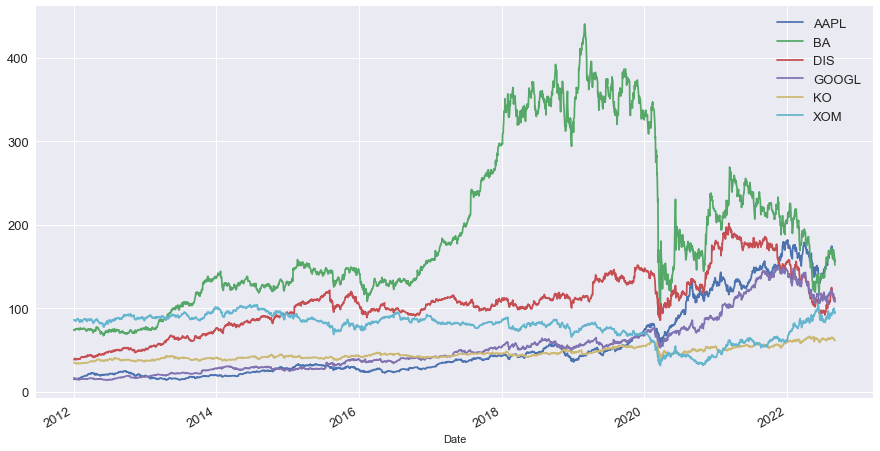

In [12]:
close.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### Time Series Analysis

A time series is a sequence of data points that occur in successive order over some period of time.
In investing, a time series tracks the movement of the chosen data points, such as a security’s price, over a specified period of time with data points recorded at regular intervals. There is no minimum or maximum amount of time that must be included, allowing the data to be gathered in a way that provides the information being sought by the investor or analyst examining the activity.
Here, We have chosen the close price of the stocks as mentioned above to carry out various forecasting methods.

##### Normalizing Time Series to a Base Value

Normalizing the time series helps us compare the performance of the securities starting at different price levels.

In [13]:
close.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000


In [14]:
close.iloc[0,0]

14.686785697937012

In [15]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2012-01-03     100.000000
2012-01-04     100.537408
2012-01-05     101.653575
2012-01-06     102.716242
2012-01-09     102.553316
                 ...     
2022-08-29    1098.810919
2022-08-30    1081.993071
2022-08-31    1070.486112
2022-09-01    1075.524692
2022-09-02    1060.885620
Name: AAPL, Length: 2686, dtype: float64

In [16]:
close.iloc[0]

AAPL     14.686786
BA       74.220001
DIS      38.310001
GOOGL    16.651901
KO       35.070000
XOM      86.000000
Name: 2012-01-03 00:00:00, dtype: float64

In [17]:
norm = close.div(close.iloc[0]).mul(100)
norm

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
2012-01-04,100.537408,100.148209,101.409546,100.431321,99.37268,100.023252
2012-01-05,101.653575,99.070328,103.106235,99.038188,98.90220,99.720933
2012-01-06,102.716242,99.676640,104.176451,97.687149,98.27488,98.976747
2012-01-09,102.553316,100.417674,103.758806,93.545336,98.27488,99.418605
...,...,...,...,...,...,...
2022-08-29,1098.810919,222.877924,296.345588,657.102132,178.87083,116.418608
2022-08-30,1081.993071,218.552956,293.474279,654.219604,177.21700,111.988369
2022-08-31,1070.486112,215.912150,292.560683,649.895766,175.96236,111.151159


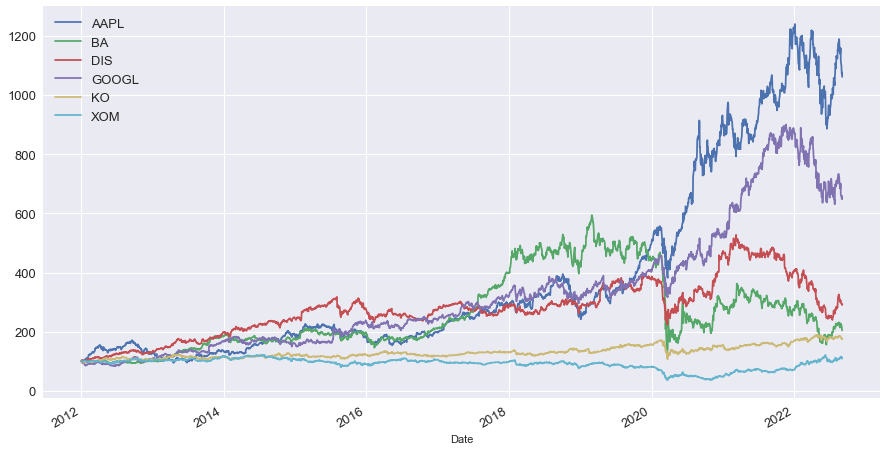

In [18]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

##### Shift method

In [19]:
close.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000


In [20]:
aapl = close.AAPL.copy().to_frame()

In [21]:
aapl.head()

,AAPL
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [22]:
aapl.shift(periods = 1)

,AAPL
Date,
2012-01-03,NaN
2012-01-04,14.686786
2012-01-05,14.765714
2012-01-06,14.929643
2012-01-09,15.085714
...,...
2022-08-29,163.619995
2022-08-30,161.380005
2022-08-31,158.910004


In [23]:
aapl["lag1"] = aapl.shift(periods = 1)

In [24]:
aapl.head()

,AAPL,lag1
Date,,
2012-01-03,14.686786,NaN
2012-01-04,14.765714,14.686786
2012-01-05,14.929643,14.765714
2012-01-06,15.085714,14.929643
2012-01-09,15.061786,15.085714


In [25]:
aapl.AAPL.sub(aapl.lag1)

Date
2012-01-03         NaN
2012-01-04    0.078928
2012-01-05    0.163929
2012-01-06    0.156072
2012-01-09   -0.023929
                ...   
2022-08-29   -2.239990
2022-08-30   -2.470001
2022-08-31   -1.690002
2022-09-01    0.740005
2022-09-02   -2.150009
Length: 2686, dtype: float64

In [26]:
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [27]:
aapl.head()

,AAPL,lag1,Diff
Date,,,
2012-01-03,14.686786,NaN,NaN
2012-01-04,14.765714,14.686786,0.078928
2012-01-05,14.929643,14.765714,0.163929
2012-01-06,15.085714,14.929643,0.156072
2012-01-09,15.061786,15.085714,-0.023929


In [28]:
aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

Date
2012-01-03         NaN
2012-01-04    0.537408
2012-01-05    1.110200
2012-01-06    1.045381
2012-01-09   -0.158618
                ...   
2022-08-29   -1.369020
2022-08-30   -1.530550
2022-08-31   -1.063497
2022-09-01    0.470682
2022-09-02   -1.361110
Length: 2686, dtype: float64

In [29]:
aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [30]:
aapl.head()

,AAPL,lag1,Diff,pct_change
Date,,,,
2012-01-03,14.686786,NaN,NaN,NaN
2012-01-04,14.765714,14.686786,0.078928,0.537408
2012-01-05,14.929643,14.765714,0.163929,1.110200
2012-01-06,15.085714,14.929643,0.156072,1.045381
2012-01-09,15.061786,15.085714,-0.023929,-0.158618


### Measuring Stock Returns with Mean and Standard Deviation

In [31]:
aapl = close.AAPL.copy().to_frame()

In [32]:
aapl.head()

,AAPL
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [33]:
aapl.pct_change().dropna()

,AAPL
Date,
2012-01-04,0.005374
2012-01-05,0.011102
2012-01-06,0.010454
2012-01-09,-0.001586
2012-01-10,0.003580
...,...
2022-08-29,-0.013690
2022-08-30,-0.015305
2022-08-31,-0.010635


In [34]:
ret = aapl.pct_change().dropna()
ret.head()

,AAPL
Date,
2012-01-04,0.005374
2012-01-05,0.011102
2012-01-06,0.010454
2012-01-09,-0.001586
2012-01-10,0.003580


In [35]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2685 entries, 2012-01-04 to 2022-09-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2685 non-null   float64
dtypes: float64(1)
memory usage: 42.0 KB


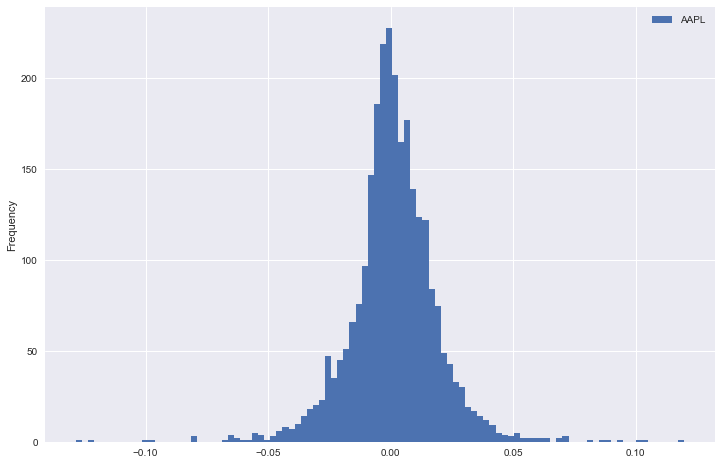

In [36]:
ret.plot(kind = "hist", figsize = (12 ,8), bins = 100)
plt.show()

In [37]:
daily_mean_Return = ret.mean()
daily_mean_Return

AAPL    0.001044
dtype: float64

In [38]:
var_daily_Returns = ret.var()
var_daily_Returns

AAPL    0.000328
dtype: float64

In [39]:
std_daily_Returns = np.sqrt(var_daily_Returns)
std_daily_Returns

AAPL    0.0181
dtype: float64

In [40]:
ret.std()

AAPL    0.0181
dtype: float64

In [41]:
ann_mean_Return = ret.mean() * 252
ann_mean_Return

AAPL    0.263086
dtype: float64

In [42]:
ann_var_Returns = ret.var() * 252
ann_var_Returns

AAPL    0.082553
dtype: float64

In [43]:
ann_std_Returns = np.sqrt(ann_var_Returns)
ann_std_Returns

AAPL    0.287321
dtype: float64

In [44]:
ret.std() * np.sqrt(252)

AAPL    0.287321
dtype: float64

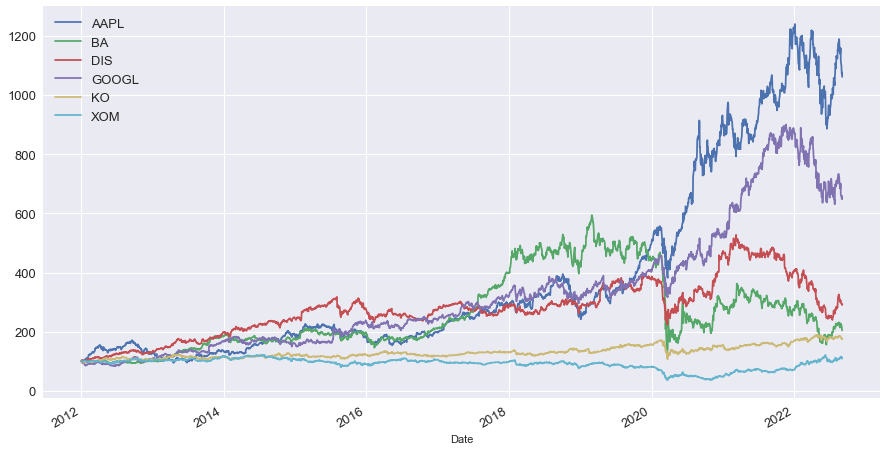

In [45]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [46]:
close.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-03,14.686786,74.220001,38.310001,16.651901,35.070000,86.000000
2012-01-04,14.765714,74.330002,38.849998,16.723724,34.849998,86.019997
2012-01-05,14.929643,73.529999,39.500000,16.491741,34.685001,85.760002
2012-01-06,15.085714,73.980003,39.910000,16.266768,34.465000,85.120003
2012-01-09,15.061786,74.529999,39.750000,15.577077,34.465000,85.500000


In [47]:
close.pct_change().dropna()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-04,0.005374,0.001482,0.014095,0.004313,-0.006273,0.000233
2012-01-05,0.011102,-0.010763,0.016731,-0.013872,-0.004734,-0.003022
2012-01-06,0.010454,0.006120,0.010380,-0.013642,-0.006343,-0.007463
2012-01-09,-0.001586,0.007434,-0.004009,-0.042399,0.000000,0.004464
2012-01-10,0.003580,0.006306,-0.003019,0.001092,0.005948,0.002573
...,...,...,...,...,...,...
2022-08-29,-0.013690,0.005409,-0.004734,-0.008338,-0.006021,0.022990
2022-08-30,-0.015305,-0.019405,-0.009689,-0.004387,-0.009246,-0.038054
2022-08-31,-0.010635,-0.012083,-0.003113,-0.006609,-0.007080,-0.007476


In [48]:
ret = close.pct_change().dropna()

In [49]:
ret.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-04,0.005374,0.001482,0.014095,0.004313,-0.006273,0.000233
2012-01-05,0.011102,-0.010763,0.016731,-0.013872,-0.004734,-0.003022
2012-01-06,0.010454,0.006120,0.010380,-0.013642,-0.006343,-0.007463
2012-01-09,-0.001586,0.007434,-0.004009,-0.042399,0.000000,0.004464
2012-01-10,0.003580,0.006306,-0.003019,0.001092,0.005948,0.002573


In [50]:
ret.describe().T.loc[:, ["mean", "std"]]

,mean,std
AAPL,0.001044,0.018100
BA,0.000544,0.023534
DIS,0.000522,0.015823
GOOGL,0.000832,0.016509
KO,0.000270,0.011192
XOM,0.000172,0.016298


In [51]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
AAPL,0.001044,0.018100
BA,0.000544,0.023534
DIS,0.000522,0.015823
GOOGL,0.000832,0.016509
KO,0.000270,0.011192
XOM,0.000172,0.016298


In [52]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

In [53]:
summary

,mean,std
AAPL,0.263086,0.287321
BA,0.137036,0.373594
DIS,0.131439,0.251176
GOOGL,0.209584,0.262068
KO,0.068055,0.177674
XOM,0.043392,0.258722


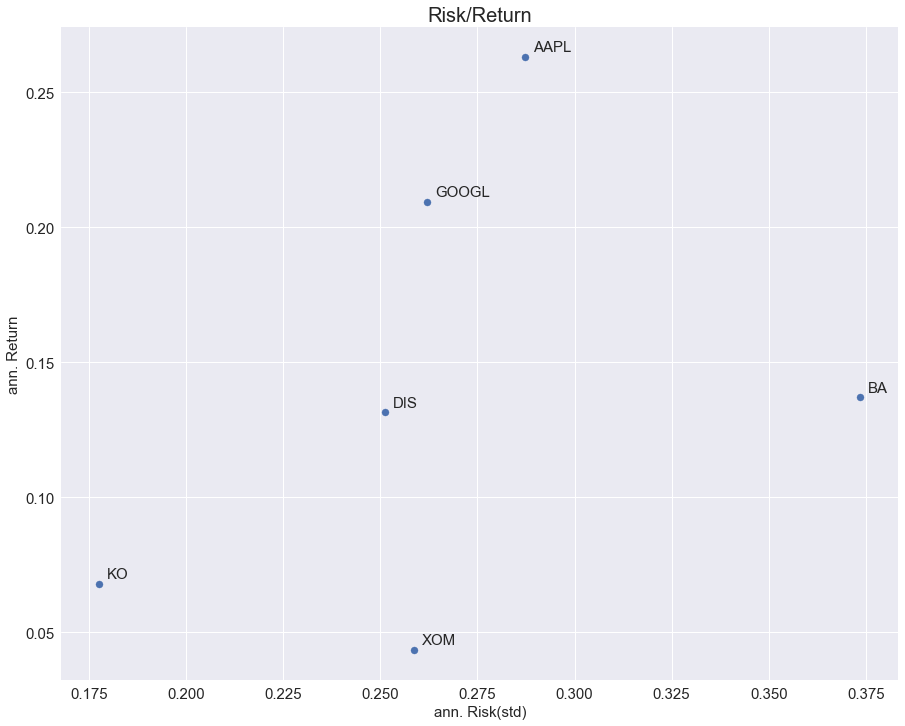

In [54]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Covariance and Correlation


In [55]:
ret.head()

,AAPL,BA,DIS,GOOGL,KO,XOM
Date,,,,,,
2012-01-04,0.005374,0.001482,0.014095,0.004313,-0.006273,0.000233
2012-01-05,0.011102,-0.010763,0.016731,-0.013872,-0.004734,-0.003022
2012-01-06,0.010454,0.006120,0.010380,-0.013642,-0.006343,-0.007463
2012-01-09,-0.001586,0.007434,-0.004009,-0.042399,0.000000,0.004464
2012-01-10,0.003580,0.006306,-0.003019,0.001092,0.005948,0.002573


In [56]:
ret.cov()

,AAPL,BA,DIS,GOOGL,KO,XOM
AAPL,0.000328,0.000161,0.000113,0.000162,0.000066,0.000088
BA,0.000161,0.000554,0.000192,0.000152,0.000108,0.000190
DIS,0.000113,0.000192,0.000250,0.000118,0.000077,0.000116
GOOGL,0.000162,0.000152,0.000118,0.000273,0.000066,0.000091
KO,0.000066,0.000108,0.000077,0.000066,0.000125,0.000076
XOM,0.000088,0.000190,0.000116,0.000091,0.000076,0.000266


In [57]:
ret.corr()

,AAPL,BA,DIS,GOOGL,KO,XOM
AAPL,1.000000,0.378841,0.393150,0.542308,0.327105,0.298812
BA,0.378841,1.000000,0.515491,0.391357,0.408985,0.494624
DIS,0.393150,0.515491,1.000000,0.450208,0.436721,0.450592
GOOGL,0.542308,0.391357,0.450208,1.000000,0.355457,0.339422
KO,0.327105,0.408985,0.436721,0.355457,1.000000,0.415787
XOM,0.298812,0.494624,0.450592,0.339422,0.415787,1.000000


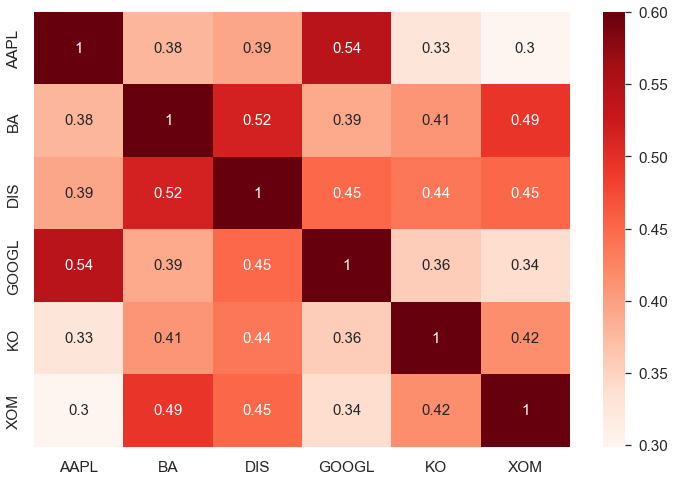

In [58]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax = 0.6)
plt.show()

### Simple Returns vs Log Returns

In [59]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [60]:
df

,Price
2016,100
2017,50
2018,95


In [61]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [62]:
simple_returns.mean()

Price    0.2
dtype: float64

In [63]:
100 * 1.2 * 1.2

144.0

In [64]:
df

,Price
2016,100
2017,50
2018,95


In [65]:
np.log(df / df.shift(1))

,Price
2016,NaN
2017,-0.693147
2018,0.641854


In [66]:
log_returns = np.log(df / df.shift(1)).dropna()

In [67]:
log_returns

,Price
2017,-0.693147
2018,0.641854


In [68]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [69]:
100 * np.exp(2 * log_returns.mean())

Price    95.0
dtype: float64

### Simple Moving Averages

In [70]:
SP500 = yf.download("^GSPC", start = "2012-01-01", end = "2022-09-06")

[*********************100%***********************]  1 of 1 completed


In [71]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [72]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,4030.610107,3396510000
2022-08-30,4041.250000,4044.979980,3965.209961,3986.159912,3986.159912,3835860000
2022-08-31,4000.669922,4015.370117,3954.530029,3955.000000,3955.000000,4542490000
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3966.850098,4152250000
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,3924.260010,3665850000


In [73]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2686 entries, 2012-01-03 to 2022-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2686 non-null   float64
 1   High       2686 non-null   float64
 2   Low        2686 non-null   float64
 3   Close      2686 non-null   float64
 4   Adj Close  2686 non-null   float64
 5   Volume     2686 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.9 KB


In [74]:
SP500 = SP500.Close.to_frame()

In [75]:
SP500.head()

,Close
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951


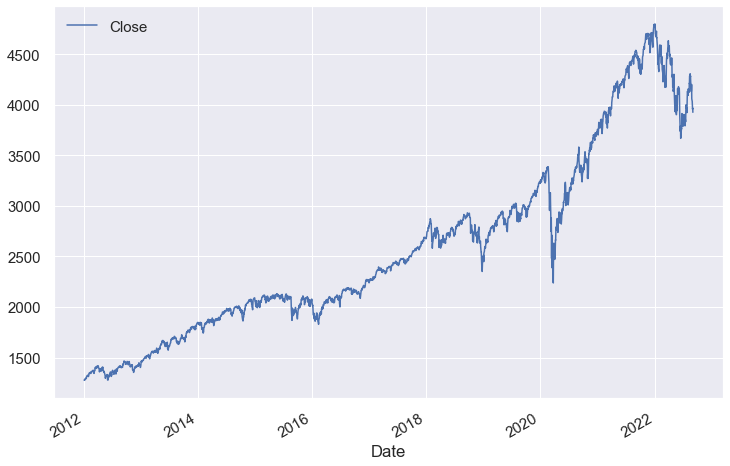

In [76]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [77]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0,method=single]

In [78]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [79]:
SP500.head(15)

,Close
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951
2012-01-10,1292.079956
2012-01-11,1292.479980
2012-01-12,1295.500000
2012-01-13,1289.089966


In [80]:
SP500.rolling(window = 10).mean()

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2022-08-29,4178.634082
2022-08-30,4146.730054
2022-08-31,4114.826050


In [81]:
SP500.rolling(window = 10).median()[:20]

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
2012-01-10,NaN
2012-01-11,NaN
2012-01-12,NaN
2012-01-13,NaN


In [82]:
SP500.rolling(window = 10, min_periods=5).mean()

,Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,1278.786035
...,...
2022-08-29,4178.634082
2022-08-30,4146.730054
2022-08-31,4114.826050


In [83]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

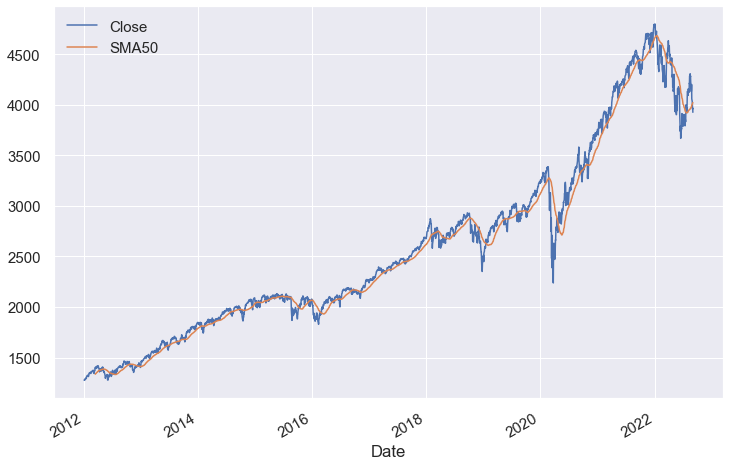

In [84]:
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [85]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

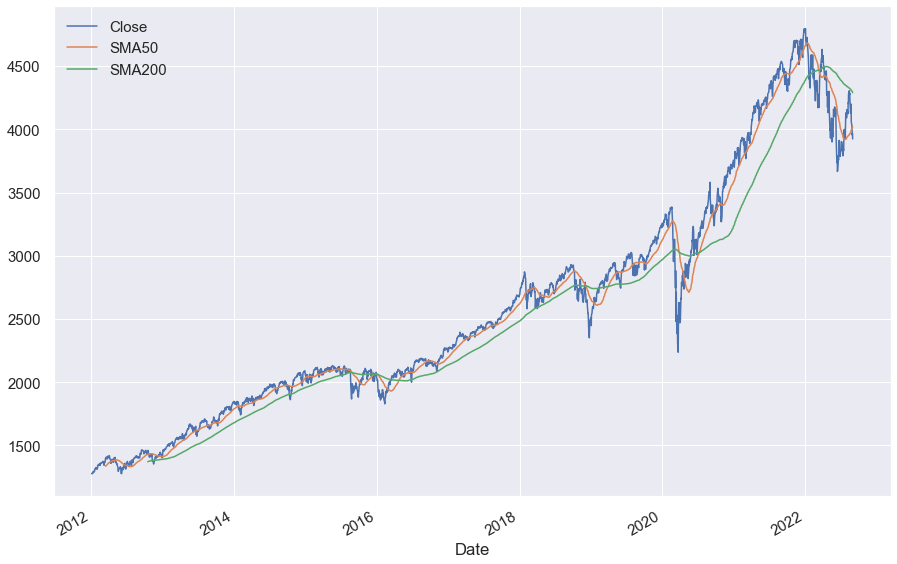

In [86]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()